# Some information

**House prices** in Victoria, Australia, can vary significantly depending on the region, property type, and current market conditions. Generally, house prices are categorized into low, medium, and high ranges as follows:

1. Low-Range House Prices:

    - Price Range: Under $600,000.

    - This typically includes older homes, smaller properties, or houses in more regional or outer suburban areas.

    - Examples of locations: Geelong, Ballarat, Melton, or outer suburbs like Werribee or Cranbourne.

2. Medium-Range House Prices:

    - Price Range: Between $600,000 and $1,000,000.

    - This range includes well-established suburbs and properties with more features or larger blocks of land.

    - Examples of locations: Suburbs like Reservoir, Sunshine, or Frankston, as well as parts of the eastern and western suburbs of Melbourne.

3. High-Range House Prices:

    - Price Range: Over $1,000,000.


    - High-end homes are typically found in more affluent or central areas, featuring luxury finishes or larger plots of land.


    - Examples of locations: Melbourne’s inner suburbs such as South Yarra, Hawthorn, Brighton, or Toorak, where prices can exceed $2 million.

These categories provide a general guide, but local conditions and individual property characteristics can cause variations. Are you looking for specific data or a comparison across regions?

**Good accuracy score** in Machine Learning is considered between **70%** and **90%**

Hypothetical Percentages for Offense Rates:

1. Low Offense Rate:

    - Percentage: Below 70% of the average crime rate.

    - For example, if the average crime rate is 5,500 offenses per 100,000 people, a low offense rate would be less than 3,850 offenses per 100,000 people (i.e., less than 70% of the average).

2. Medium Offense Rate:

    - Percentage: Between 70% and 130% of the average crime rate.

    - This would mean an offense rate between 3,850 and 7,150 offenses per 100,000 people.

3. High Offense Rate:

    - Percentage: Above 130% of the average crime rate.

    - For example, if the crime rate exceeds 7,150 offenses per 100,000 people, this would be considered high.

These thresholds provide a relative comparison to help categorize crime rates as low, medium, or high in relation to an average or benchmark rate.

In Victoria, losses from electronic gaming machines (EGMs) can be classified as "low," "medium," or "high" depending on the context, such as the total losses in a specific local government area or per venue. The classification is often based on comparison with the state average or other regions. Here's a general framework:

1. Low Losses from EGMs

    - Definition: Areas or venues with losses significantly below the state average.

    - Range: Losses under $10 million annually for smaller venues or regions.

    - Example: Rural areas or regions with fewer gaming venues may experience lower losses, around $5 million or less annually.

2. Medium Losses from EGMs

    - Definition: Areas or venues with losses around the state average.

    - Range: Losses between $10 million and $50 million annually.

    - Example: Some mid-sized cities or suburban areas may fall into this category. For example, local government areas with several venues can see losses in this range.

3. High Losses from EGMs

    - Definition: Areas or venues with losses significantly above the average, often seen in urban centers or areas with many gaming venues.

    - Range: Losses above $50 million annually.

    - Example: Large urban areas like the City of Greater Dandenong had some of the highest EGM losses in Victoria, with figures exceeding $100 million annually​(Crime Statistics Agency Victoria).

These ranges give a general sense of low, medium, and high losses, but they can vary depending on the local context and policies surrounding gaming machine regulation.

Level definition:

1 - low

2 - medium

3 - high

# K-NN

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# level definition
# low, medium, high = 1, 2, 3

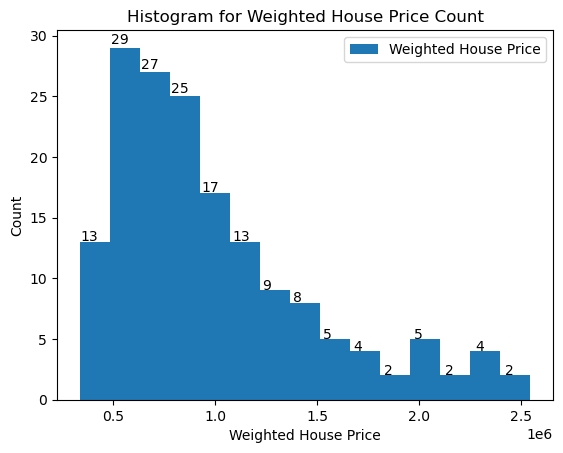

In [8]:
# Prepare data

houses_by_lga = pd.read_csv("Houses by LGA.csv")
houses_by_lga.set_index(["LGA", "Year"], inplace=True)

offences_by_lga = pd.read_csv("Offences By LGA NEW.csv")
offences_by_lga.set_index(["LGA", "Year"], inplace=True)

egm_by_lga = pd.read_csv("EGM-New-Format.csv")
egm_by_lga.set_index(["LGA", "Year"], inplace=True)



merged_data = houses_by_lga.merge(offences_by_lga, how="inner", on=["LGA", "Year"]) \
                           .merge(egm_by_lga, how="inner", on=["LGA", "Year"])

merged_data.rename(columns={"total dollars" : "Total Loss On EGM", "rate" : "EGM Rate"}, inplace=True)

merged_data



ax = merged_data.plot.hist(
    column="Weighted House Price",
    bins=15
    )

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.title("Histogram for Weighted House Price Count")
plt.xlabel("Weighted House Price")
plt.ylabel("Count")
plt.show()




array([[<Axes: title={'center': 'EGM Rate'}>]], dtype=object)

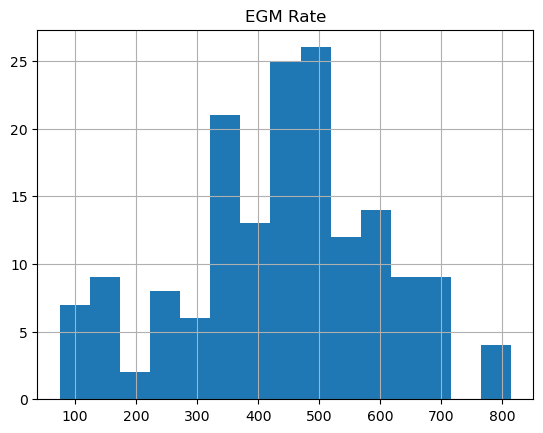

In [24]:
merged_data.hist(
    column="EGM Rate",
    bins = 15
)

array([[<Axes: title={'center': 'Offence Rate'}>]], dtype=object)

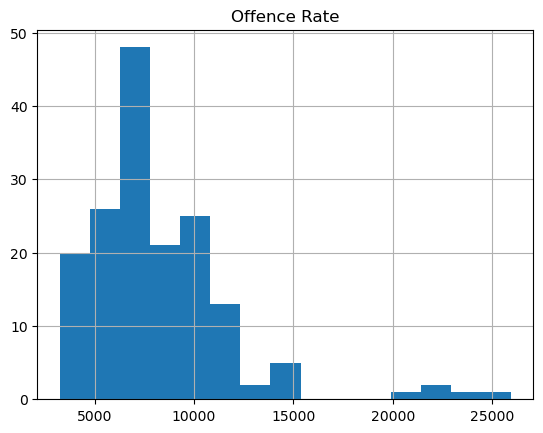

In [25]:
merged_data.hist(
    column="Offence Rate",
    bins=15
)

In [26]:

# Level generators

# Definitoins for Offence Rate Level

# mean_offence_rate = merged_data["Offence Rate"].mean()

# low_offence_rate = mean_offence_rate*0.7
# high_offence_rate = mean_offence_rate*1.3

low_offence_rate = merged_data["Offence Rate"].quantile(.30)
high_offence_rate = merged_data["Offence Rate"].quantile(.70)



def offence_rate_level_generator(offence_rate):
    if offence_rate < low_offence_rate:
        return "Low"
    elif (offence_rate >= low_offence_rate) and (offence_rate <= high_offence_rate):
        return "Medium"
    else:
        return "High"
    

# Defininitions for Total Loss On EGM Level

# low_egm = 10_000_000
# high_egm = 50_000_000
low_egm = merged_data["Total Loss On EGM"].quantile(.30)
high_egm = merged_data["Total Loss On EGM"].quantile(.70)

def total_loss_on_egm_level_generator(egm_loss):
    if egm_loss < low_egm:
        return "Low"
    elif low_egm <= egm_loss <= high_egm:
        return "Medium"
    else:
        return "High"

# Definitions for EGM Rate Level
low_egm_rate = merged_data["EGM Rate"].quantile(.30)
high_egm_rate = merged_data["EGM Rate"].quantile(.70)

def egm_rate_level_generator(egm_rate):
    if egm_rate < low_egm_rate:
        return "Low"
    elif low_egm_rate <= egm_rate <= high_egm_rate:
        return "Medium"
    else:
        return "High"
    
# Definitions for Weighted House Price Level
low_weighted_house_price = 600_000
high_weighted_house_price = 1_000_000
# low_weighted_house_price = merged_data["Weighted House Price"].quantile(.333)
# medium_weighted_house_price = merged_data["Weighted House Price"].quantile(.50)
# high_weighted_house_price = merged_data["Weighted House Price"].quantile(.667)

def weighted_house_price_level_generator(weighted_house_price):
    if weighted_house_price < low_weighted_house_price:
        return "Low"
    elif low_weighted_house_price <= weighted_house_price < high_weighted_house_price:
        return "Medium"
    else:
        return "High"

In [27]:
# pd.concat([merged_data[merged_data.index.get_level_values("Year") == 2016], merged_data[merged_data.index.get_level_values("Year") == 2017]])
    

    
merged_data["Offence Rate Level"] = merged_data["Offence Rate"].apply(offence_rate_level_generator)
merged_data["Total Loss On EGM Level"] = merged_data["Total Loss On EGM"].apply(total_loss_on_egm_level_generator)
merged_data["EGM Rate Level"] = merged_data["EGM Rate"].apply(egm_rate_level_generator)
merged_data["Weighted House Price Level"] = merged_data["Weighted House Price"].apply(weighted_house_price_level_generator)


print(len(merged_data))
merged_data

merged_data["Weighted House Price Level"].value_counts()


165


Weighted House Price Level
Medium    72
High      61
Low       32
Name: count, dtype: int64

In [28]:
# Find quartiles

print(merged_data["Weighted House Price"].quantile([.25, .335, .5, .665, .75]))
print()
print(merged_data["EGM Rate"].quantile([.25, .335, .5, .665, .75]))
print()
print(merged_data["Total Loss On EGM"].quantile([.25, .335, .5, .665, .75]))
print()
print(merged_data["Offence Rate"].quantile([.25, .335, .5, .665, .75]))
print()

0.250    6.273717e+05
0.335    6.709068e+05
0.500    8.652808e+05
0.665    1.034678e+06
0.750    1.212031e+06
Name: Weighted House Price, dtype: float64

0.250    343.2200
0.335    374.3986
0.500    463.2000
0.665    502.1930
0.750    544.8000
Name: EGM Rate, dtype: float64

0.250    3.739344e+07
0.335    4.929689e+07
0.500    6.003504e+07
0.665    7.758465e+07
0.750    8.335757e+07
Name: Total Loss On EGM, dtype: float64

0.250    5889.7300
0.335    6530.8680
0.500    7278.1700
0.665    9099.1478
0.750    9667.1300
Name: Offence Rate, dtype: float64



In [29]:
# Preparing train data and test data

train = pd.concat([
    merged_data[merged_data.index.get_level_values("Year") == 2016],
    merged_data[merged_data.index.get_level_values("Year") == 2017], 
    merged_data[merged_data.index.get_level_values("Year") == 2018],
   
])

test = pd.concat([
    merged_data[merged_data.index.get_level_values("Year") == 2019],
    merged_data[merged_data.index.get_level_values("Year") == 2020],
])

X_COLS = [
    "Offence Rate",
    "EGM Rate"
    ]


y_COL = ["Weighted House Price Level"]

X_train = train[X_COLS]
y_train = train[y_COL]

# Test data...
X_test = test[X_COLS]
y_test = test[y_COL]


In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Calculate accuracy score for the test data
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)

accuracy




/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6818181818181818

<Figure size 1000x1000 with 0 Axes>

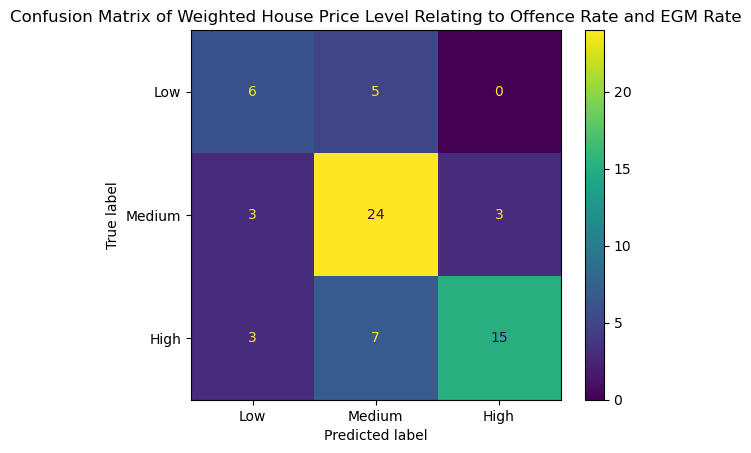

In [31]:
# Confusion matrix

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,
                      y_pred,
                      labels=["Low", "Medium" , "High"]
                      )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Low", "Medium" , "High"]
                              )

disp.plot()

plt.title("Confusion Matrix of Weighted House Price Level Relating to Offence Rate and EGM Rate")
plt.show()

## Second k-nn

In [32]:
X_COLS = [
    "EGM Rate"
]

y_COL = [
    "Weighted House Price Level"
]

Xtrainnew = train[X_COLS]
ytrainnew = train[y_COL]

Xtestnew = test[X_COLS]
ytestnew = test[y_COL]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(Xtrainnew, ytrainnew)
y_pred = knn.predict(Xtestnew)
accuracy = knn.score(Xtestnew, ytestnew)

accuracy


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.48484848484848486

## Third k-nn


In [33]:
X_COLS = [
    "Offence Rate"
]

y_COL = [
    "Weighted House Price Level"
]

Xtrainnew = train[X_COLS]
ytrainnew = train[y_COL]

Xtestnew = test[X_COLS]
ytestnew = test[y_COL]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(Xtrainnew, ytrainnew)
y_pred = knn.predict(Xtestnew)
accuracy = knn.score(Xtestnew, ytestnew)

accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6515151515151515

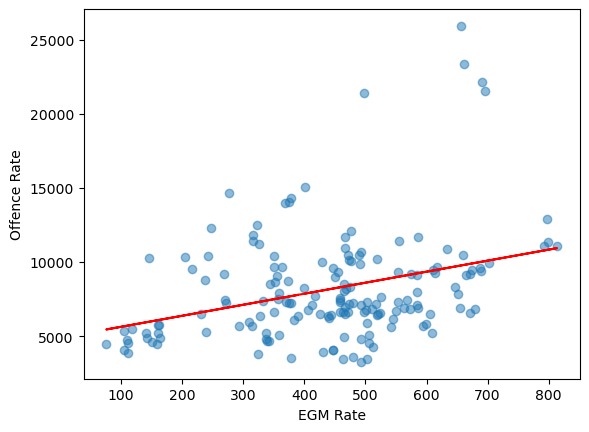

In [34]:
x = merged_data["EGM Rate"]
y = merged_data["Offence Rate"]

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.xlabel("EGM Rate")
plt.ylabel("Offence Rate")
plt.plot(x, a*x+b, c="Red")

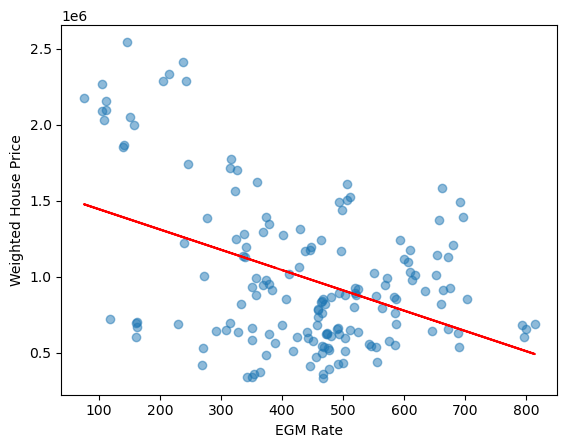

In [35]:
x = merged_data["EGM Rate"]
y = merged_data["Weighted House Price"]

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.xlabel("EGM Rate")
plt.ylabel("Weighted House Price")
plt.plot(x, a*x+b, c="Red")

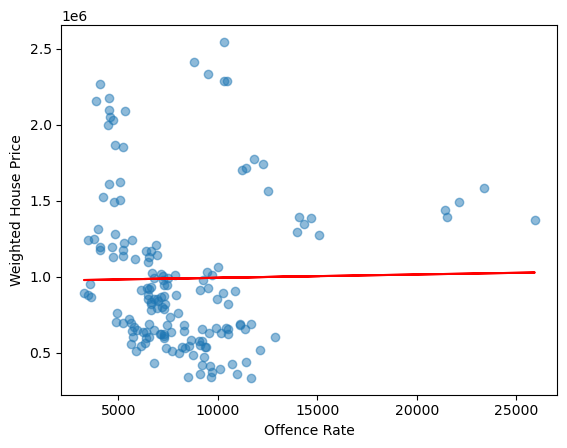

In [36]:
x = merged_data["Offence Rate"]
y = merged_data["Weighted House Price"]

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Offence Rate")
plt.ylabel("Weighted House Price")
plt.plot(x, a*x+b, c="Red")

# Decision Tree

In [37]:
X_DT_COLS = [
    "EGM Rate",
    "Offence Rate"
]

y_DT_COL = ["Weighted House Price Level"]

X = OrdinalEncoder().fit_transform(merged_data[X_DT_COLS])

y = OrdinalEncoder().fit_transform(merged_data[y_DT_COL])

print(X)
print(y)

[[ 61. 159.]
 [141.  94.]
 [152. 117.]
 [ 32. 153.]
 [ 87. 148.]
 [139. 140.]
 [111.  77.]
 [ 21. 135.]
 [ 42. 123.]
 [  3.  19.]
 [134.  53.]
 [120.  82.]
 [122. 146.]
 [ 24.  87.]
 [157. 154.]
 [ 76.  89.]
 [128.  96.]
 [ 77.  91.]
 [  7.  29.]
 [ 12.  38.]
 [ 71. 122.]
 [ 48.  95.]
 [107.  25.]
 [ 64.  93.]
 [ 39.  18.]
 [144. 138.]
 [ 72.   9.]
 [ 83. 103.]
 [143. 164.]
 [ 94. 151.]
 [ 82.  24.]
 [ 82.  97.]
 [104.  65.]
 [ 55. 156.]
 [142.  71.]
 [140. 100.]
 [ 30. 147.]
 [ 85. 141.]
 [136. 118.]
 [113.  50.]
 [ 19. 106.]
 [ 41. 102.]
 [  2.  10.]
 [132.  36.]
 [119.  63.]
 [121. 116.]
 [ 27.  37.]
 [156. 143.]
 [ 79.  59.]
 [127.  75.]
 [ 84.  72.]
 [ 10.  16.]
 [ 13.  28.]
 [ 75. 115.]
 [ 47.  90.]
 [108.  14.]
 [ 65.  55.]
 [ 38.  21.]
 [146. 110.]
 [ 67.   7.]
 [ 92.  76.]
 [145. 163.]
 [ 91. 130.]
 [ 96.   4.]
 [ 96.  80.]
 [105.  41.]
 [ 56. 157.]
 [150.  68.]
 [148. 112.]
 [ 31. 150.]
 [ 95. 129.]
 [138. 125.]
 [115.  57.]
 [ 17. 120.]
 [ 46. 108.]
 [  4.   6.]
 [135.  27.]

In [38]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

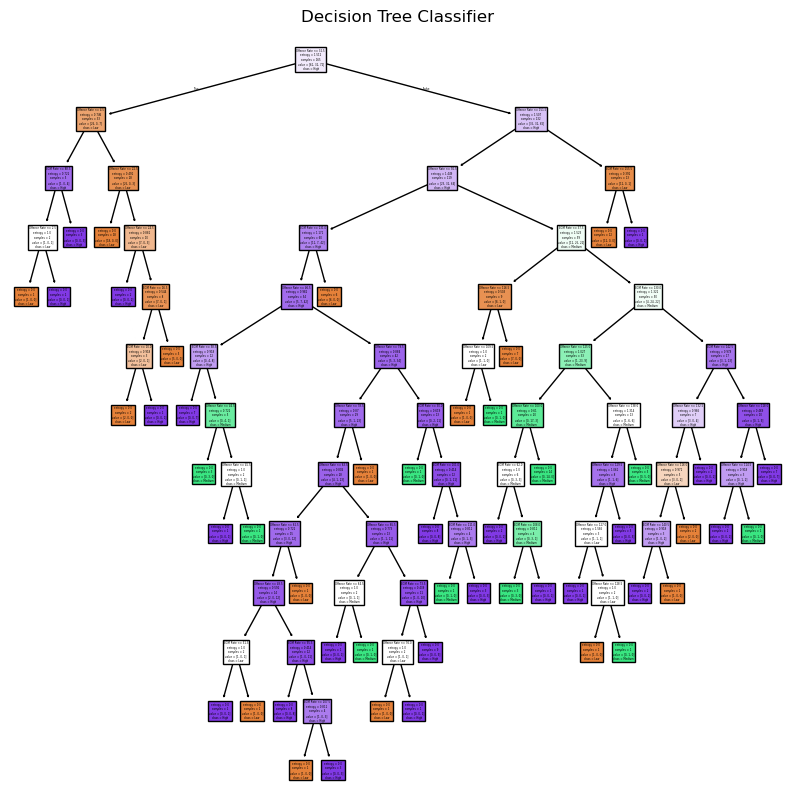

In [39]:
plt.figure(figsize=(10,10))

plot_tree(
    dt,
    feature_names=X_DT_COLS,
    class_names=['Low', "Medium" , 'High'],
    filled=True
)


plt.title("Decision Tree Classifier")
plt.show()

In [40]:
X_COLS = [
    "Offence Rate",
    "EGM Rate"
]

Y_COL = [
    "Weighted House Price Level"
]

Xtrainnew = train[X_COLS]
ytrainnew = train[y_COL]

Xtestnew = test[X_COLS]
ytestnew = test[y_COL]

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(Xtrainnew, ytrainnew)
acc = dt2.score(Xtestnew, ytestnew)

print(acc)

0.7424242424242424
